In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf


In [2]:
def sample_autocovariance(h, x):
    x = np.array(x)
    h = int(np.abs(h))
    x_bar = np.mean(x)
    gamma_hat = 0
    for t in range(len(x)-h):
        gamma_hat += (x[t+h] - x_bar)*(x[t] - x_bar)
    return gamma_hat/len(x)

In [3]:
def sample_ACF(h, data):
    return sample_autocovariance(h, data)/sample_autocovariance(0, data)

In [13]:
#df = pd.read_excel("data.xlsx", engine = 'openpyxl')
df = pd.read_csv("data.csv")

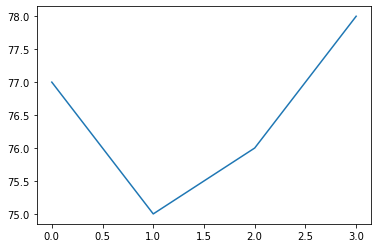

In [14]:
#data = df.iloc[:,0]
data = np.array([77, 75, 76, 78])
data.shape
n = len(data)
np.mean(data)
plt.plot(data)

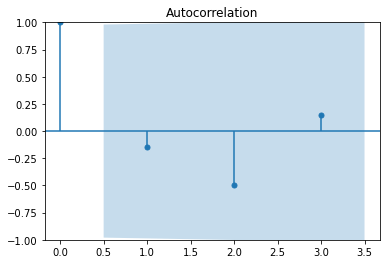

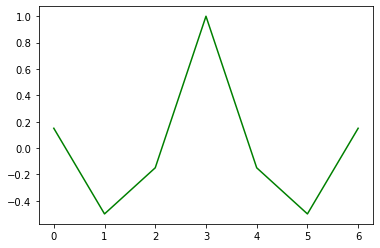

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

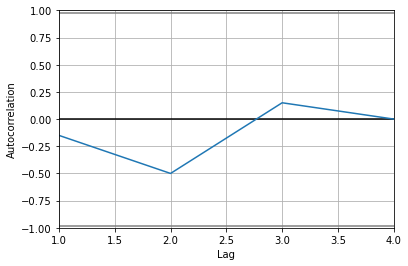

In [15]:
ACF = []
for h in range(-n+1, n):
    ACF.append(sample_ACF(h, data))
ACF = np.array(ACF)
ax1 = plot_acf(data)
plt.show()
plt.plot(ACF, 'g')
plt.show()
pd.plotting.autocorrelation_plot(data)


**$ \textbf{Moving Average Fitting} $**

In [16]:
# moving average fitting
def MA(X, q):
    W = []
    for t in range(q):
        m_t = ((q+1-t)*X[0] + sum(X[1:q+t+1]))
        W.append(m_t/(2*q+1))
    t = q
    while t + q < len(X):
        W.append(sum(X[t - q:t + q + 1]) / (2 * q + 1))
        t = t + 1
    for t in range(len(X)-q, len(X)):
        W.append((sum(X[t-q: len(X)]) + (q+t-len(X)+1)*X[len(X)-1])/(2*q+1))
    plt.plot(range(len(X)), X)
    plt.plot(range( len(X) ), W)
    #plt.plot(X - W)
    plt.show()
    return W


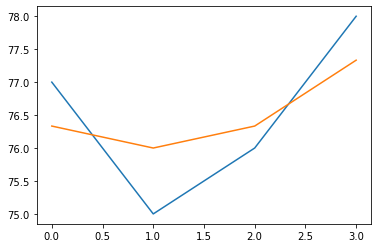

[76.33333333333333, 76.0, 76.33333333333333, 77.33333333333333]
[ 0.66666667 -1.         -0.33333333  0.66666667]


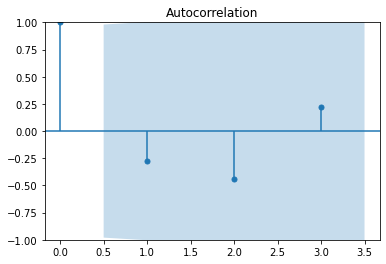

In [17]:
W = MA(data, 1)
print(W)
data_extract_MA = data - W
print(data_extract_MA)
plot_acf(data_extract_MA)
plt.show()

$\textbf{Polynomial fitting}$

In [18]:
# polynomial fitting
def poly(X, order):
    coeff = np.polynomial.polynomial.polyfit(range(len(X)), X, order)
    W = []
    for i in range(len(X)):
        W.append(sum([i**j * coeff[j] for j in range(len(coeff))])) 
    plt.plot(range(len(X)), X)
    plt.plot(range(len(X)), W)
    plt.show()
    return W

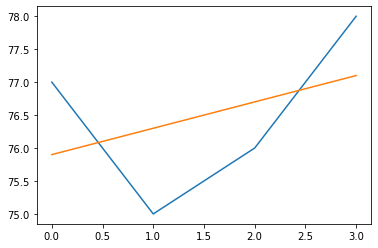

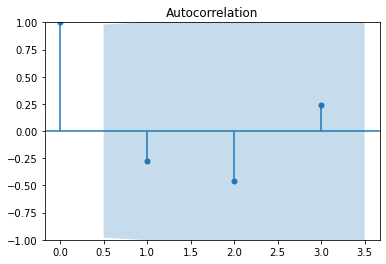

In [19]:
poly_1 = poly(data, 1)
data_new = data - poly_1
plot_acf(data_new)
plt.show()

$\textbf{ES(}\alpha\textbf{)}$

In [20]:
def ES(X, alpha):
    m = [X[0]]
    for t in range(1, len(X)):
        m.append(alpha * X[t] + (1-alpha)*m[t-1])
    return np.array(m)


[77.    76.2   76.12  76.872]


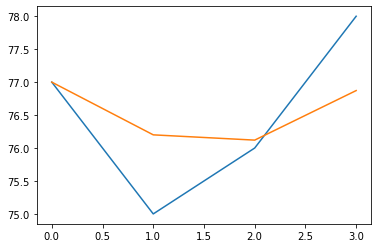

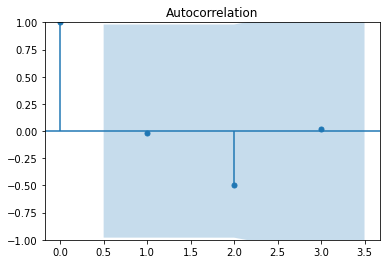

In [21]:
m = ES(data, 0.4)
data_extract_ES = data - m
print(m)
plt.plot(data)
plt.plot(m)
plt.show()
plot_acf(data_extract_ES)
plt.show()


In [22]:
def Holt(X, alpha, beta):
    L = [0]
    m = ES(X, alpha)
    for t in range(1, len(X)):
        L.append(beta *(m[t] - m[t-1]) + (1-beta) * L[t-1])
    return np.array(L + m)


[77.     75.72   75.88   77.2272]


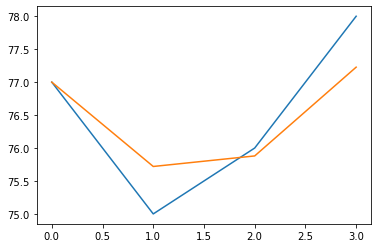

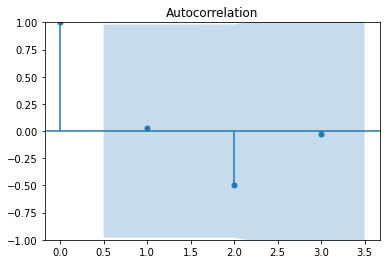

In [23]:
H = Holt(data, 0.4, 0.6)
print(H)
data_extract_Holt = data - H
plt.plot(data)
plt.plot(H)
plt.show()

plot_acf(data_extract_Holt)
plt.show()